<a href="https://colab.research.google.com/github/harishbhagtani/machine-learning-eda/blob/master/EDA_Haberman's_Cancer_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**EDA(Exploratory Data Analysis) on Haberman's Cancer Dataset**

Haberman's cancer dataset conatins data of study conducted in University of Chicago billings hospital between year 1958 to 1970 for the pateints who undergone surgery of breast cancer.

# Objective

To predict the **survival status** of patient after undergoing the operation.

# Features

* **Age** : Age of the patient
* **Operation Year** : Year in which operation was performed
* **Auxillary Nodes** : Number of lymph nodes affected
* **Survival Status** : 1 if patient survived for more than 5 years and 2 if patient died withing 5 years of operation (**Class Feature**)

#High Level Stats

* Number of features : 4
* Number of points : 305
* Number of classes : 2
* Number of points in class "1" : 224
* Number of points in class "2" : 81


# Getting the CSV file



In [0]:
#Importing the required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Getting the haberman dataset
haber = pd.read_csv("/content/drive/My Drive/datasets/haberman.csv")

# Getting the shape of the dataset

Getting shape means getting number of rows and columns in the dataset.

In [6]:
#Getting the shape of the file
print(haber.shape)

(305, 4)


So, dataset has 305 rows and 4 columns. 

# Getting column names of the dataset

In [7]:
#Getting column names
print(haber.columns)

Index(['age', 'year', 'aux_nodes', 'status'], dtype='object')


# Getting the number of class features

In [10]:
#Getting number of class features
haber['status'].value_counts()

1    224
2     81
Name: status, dtype: int64

There are 224 pateints who survived for more than 5 years after the operation and there are 81 patients who couldn't.

# Getting LOC

Here, we are dividing the data based on classes. The data with with patient class "1" is stored in object named "one" and the data with patient class 2 is stored in object "two".

In [10]:
#Dividing the data into two classes based on class feature
one = haber.loc[haber["status"] == 1]
two = haber.loc[haber["status"] == 2]
print(one)
print(two)

     age  year  aux_nodes  status
0     30    62          3       1
1     30    65          0       1
2     31    59          2       1
3     31    65          4       1
4     33    58         10       1
..   ...   ...        ...     ...
297   73    68          0       1
299   74    63          0       1
300   75    62          1       1
301   76    67          0       1
302   77    65          3       1

[224 rows x 4 columns]
     age  year  aux_nodes  status
6     34    59          0       2
7     34    66          9       2
23    38    69         21       2
33    39    66          0       2
42    41    60         23       2
..   ...   ...        ...     ...
285   70    58          4       2
292   72    63          0       2
298   74    65          3       2
303   78    65          1       2
304   83    58          2       2

[81 rows x 4 columns]


# 2-D Scatter Plot of the data

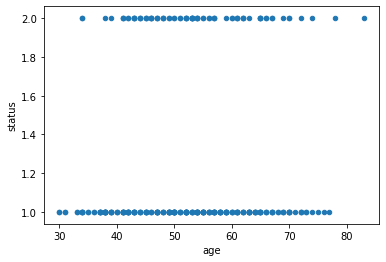

In [12]:
#Plotting the 2-D Scatter Plot
haber.plot(kind="scatter",x="age",y="status")
plt.show()

Conclusion : We plotted the 2-d plot of the patients of both the class "1" and "2" based on their age. But the data points are of the same colour and we cannot make any sense of whether the patient will survive or not based on this data.

# Pair Plot of the Data

Pair plot of age, year and auxiliary nodes.

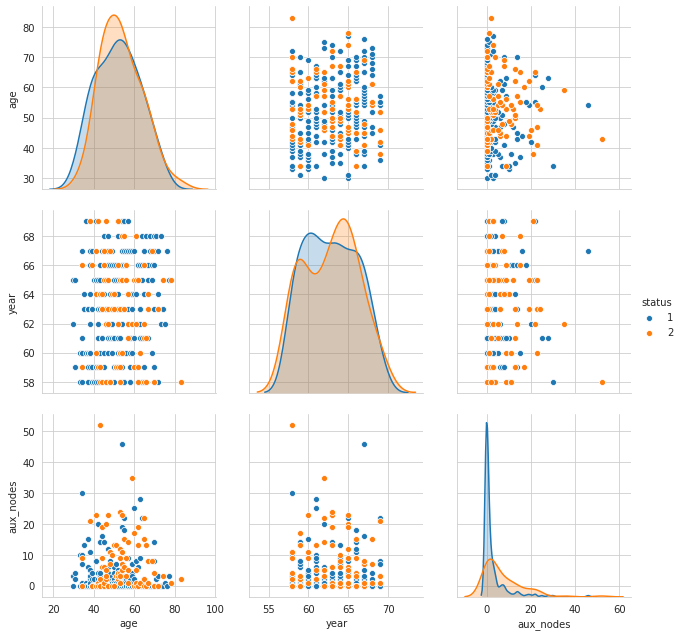

In [8]:
#Plotting a pair plot for the features : aux_nodes, year and age
plt.close()
sns.set_style("whitegrid")
sns.pairplot(haber,hue="status", height = 3, vars = ['age','year','aux_nodes'])
plt.show()

* **Plot 1, 5 and 9 are histograms and hence, we ignore them for now**

* **Plot 2:** In this plot, most of the points of survivers and non-survivers are overlapping and we cannot classify whether the patient will survive for more than 5 years. Hence, we'll reject this plot. 

 **REFERS TO : AGE AND YEAR**
 
 **STATUS : REJECTED**

* **Plot 3:** In this plot, few data points are seperated form other. Hence, this plot is better than other plot. Hence, we can classify few of the points. So, we'll select this data set.

 **REFERS TO : AGE AND AUX_NODES**

 **STATUS : SELECTED**

* **PLOT 4:** Inverted form of Plot 1. Hence, we reject this plot

 **REFERS TO : YEAR AND AGE**
 
 **STATUS : REJECTED**

* **PLOT 6:** Most of the points are overlapping and we cannott classify data based on this plot.

 **REFERS TO : YEAR AND AUX_NODES**
 
 **STATUS : REJECTED**

* **PLOT 7:** Inverted form of Plot 3. Hence, we select this plot

 **REFERS TO : AUX_NODES AND AGE**
 
 **STATUS : SELECTED**

* **PLOT 8:** Inverted form of Plot 6. Hence, we reject this plot

 **REFERS TO : AUX_NODES AND YEAR**
 
 **STATUS : REJECTED**


After alalysing data of each pair plot. We find** plot 3 and 7** as useful. Hence we select **AUX_NODES** and **AGE** features as useful.


# PDF of The Data

Here we,ll find the probablity density function for each data point.

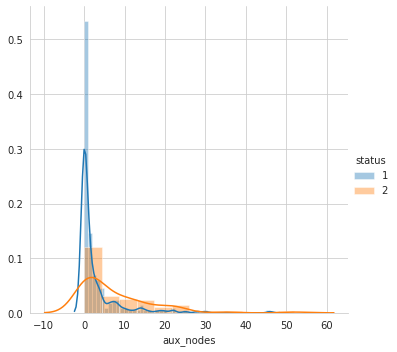

In [23]:
#Probablity Density Function of aux_nodes
sns.FacetGrid(haber,hue="status", height = 5) \
.map(sns.distplot,"aux_nodes") \
.add_legend()
plt.show()

From this PDF, we can observe that the patient with **less number of nodes (<=3) has most chances of survival**. And with nodes (>=10) has less chances of survival.

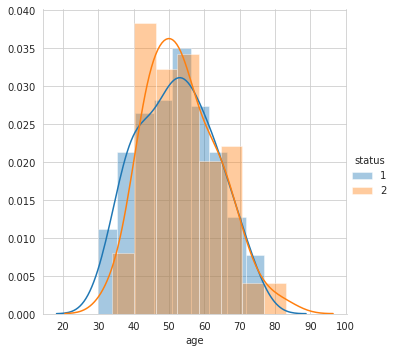

In [24]:
#Probablity Density Function of age
sns.FacetGrid(haber,hue="status", height = 5) \
.map(sns.distplot,"age") \
.add_legend()
plt.show()

Most of the the points in this PDF are overlapping. Hence, **we cannot conlude** anything with this.

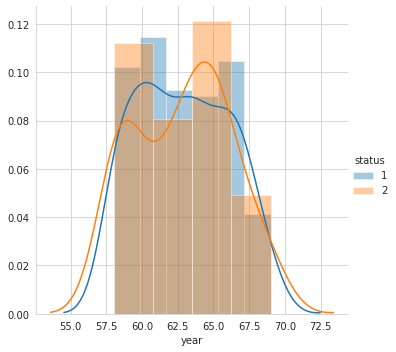

In [25]:
#Probablity Density Function of year
sns.FacetGrid(haber,hue="status", height = 5) \
.map(sns.distplot,"year") \
.add_legend()
plt.show()

In this PDF also, most of the points are overlapping and hence, **we cannot conlude** anything with this PDF.

# CDF of the data


[0.83482143 0.08035714 0.02232143 0.02678571 0.01785714 0.00446429
 0.00892857 0.         0.         0.00446429]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


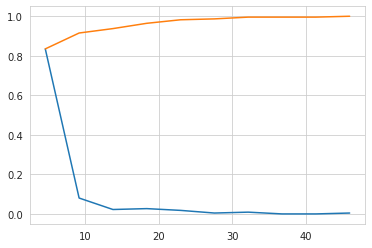

In [35]:
#Plotting CDF of aux_nodes of the survivers with status 1
counts, bin_edges = np.histogram(one["aux_nodes"], bins = 10, density = True)

pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(one['aux_nodes'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
#plt.plot(bin_edges[1:],pdf);

plt.show();


From this CDF, we can observe that the chances of survival for more than 5 years decreases when the number of aux_nodes increases. The blue line shows that probablity of more than 5 survival is more than 85%

[0.83482143 0.08035714 0.02232143 0.02678571 0.01785714 0.00446429
 0.00892857 0.         0.         0.00446429]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


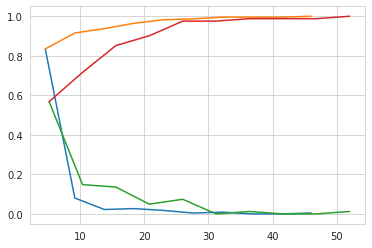

In [15]:
#Plotting CDF of data with survivors of both type 1 and 2
counts, bin_edges = np.histogram(one["aux_nodes"], bins = 10, density = True)

pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(two['aux_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

plt.show();


From this second CDF, which is combination of first CDF with a CDF of survivers which survived less than 5 years after operation, we can observe that there is around 57% chance of survival less tha 5 year when aux_nodes > 5 and the chance decreases as the aux_nodes increases.

# Box Plot of the data

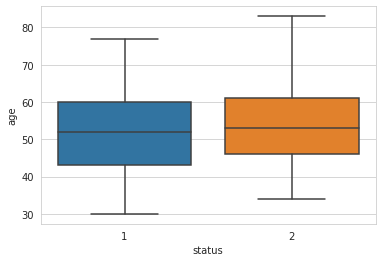

In [17]:
#Box plot of age
sns.boxplot(x="status", y="age",data=haber)
plt.show()

Quantiles are overlapping. Hence, we cannot make sense of this data.

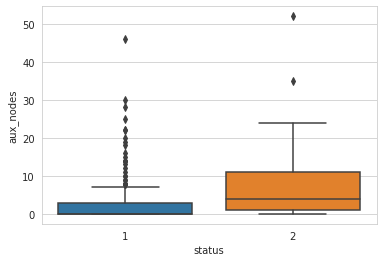

In [18]:
#Box plot of auxilary_nodes
sns.boxplot(x="status", y="aux_nodes",data=haber)
plt.show()

From these quantiles, we can observer than 75% of the patients who survived for more than 5 years has aux_nodes < 3 and 50% of survivers who survived less tha 5 years has aux_nodes > 5.

# Violen plot



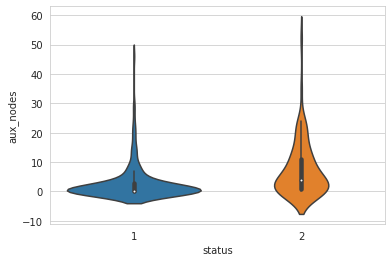

In [21]:
#Violen Plot of aux_nodes
sns.violinplot(x="status", y="aux_nodes", data=haber, size=8)
plt.show()

From this plot, we can observe **there are a lot of people with aux_nodes < 3 which survided more than 5 years** and **the number of survivers decreases as aux_nodes increases**.

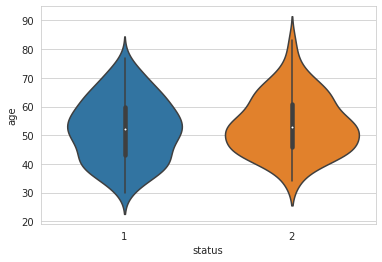

In [22]:
#Violen Plot of age
sns.violinplot(x="status", y="age", data=haber, size=8)
plt.show()

As most of the quantils of this violen plot are **overlapping**, **we cannot make any sense** of this data.

# Contour Plot

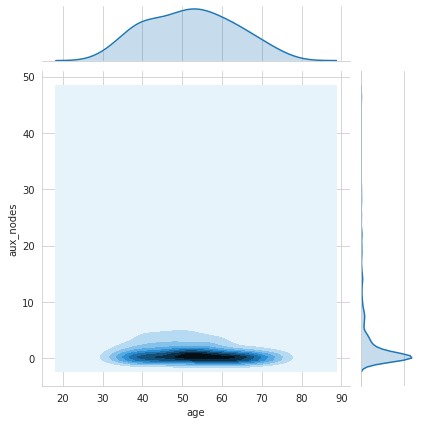

In [26]:
#Contour plot for age and aux_nodes
sns.jointplot(x="age",y="aux_nodes", data=one ,kind="kde")
plt.grid()
plt.show()

From this contour plot, we can observe that the people with **age > 45 and age < 67** and **aux_nodes < 3 (approx)** has **most chances of the survival** of more than 5 years because, the **hill area** of contour lies between this range.